In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py # if you get an error here, you may need to `pip install h5py` first
from pint import UnitRegistry # if you get an error here, you may need to `pip install pint` first

# Load HDF5 output file

In [3]:
filename = "/Users/tkoskela/Downloads/tdac.h5"
fh = h5py.File(filename,'r')
print("The following datasets found in file",filename,":",list(fh))
if "data_avg" in list(fh): print("The following time stamps found in data_avg: ", list(fh["data_avg"]))
if "data_var" in list(fh): print("The following time stamps found in data_var: ", list(fh["data_var"]))
if "data_syn" in list(fh): print("The following time stamps found in data_syn: ", list(fh["data_syn"]))

The following datasets found in file /Users/tkoskela/Downloads/tdac.h5 : ['data_avg', 'data_syn', 'data_var', 'grid', 'params', 'stations', 'timer', 'weights']
The following time stamps found in data_avg:  ['t0', 't1', 't10', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']
The following time stamps found in data_var:  ['t0', 't1', 't10', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']
The following time stamps found in data_syn:  ['t0', 't1', 't10', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']


# Set these parameters to choose what to plot

In [10]:
timestamp = 't1' # Edit this value to plot a different time slice
field = 'height' # If we add different fields, edit this value to plot them

# Collect data from the output file

In [35]:
ureg = UnitRegistry()

field_unit = fh["data_syn"][timestamp][field].attrs["Unit"].decode('UTF-8')
var_unit = fh["data_var"][timestamp][field].attrs["Unit"].decode('UTF-8')
x_unit = fh["grid"]["x"].attrs["Unit"].decode('UTF-8')
y_unit = fh["grid"]["y"].attrs["Unit"].decode('UTF-8')
x_st_unit = fh["stations"]["x"].attrs["Unit"].decode('UTF-8')
y_st_unit = fh["stations"]["y"].attrs["Unit"].decode('UTF-8')

x = (fh["grid"]["x"][:] * ureg(x_unit)).to(ureg.km)
y = (fh["grid"]["y"][:] * ureg(y_unit)).to(ureg.km)
z_t = fh["data_syn"][timestamp][field][()] * ureg(field_unit)
z_avg = fh["data_avg"][timestamp][field][()] * ureg(field_unit)
z_var = fh["data_var"][timestamp][field][()] * ureg(var_unit)
z_std = np.sqrt(z_var)
x_st = (fh["stations"]["x"][:] * ureg(x_st_unit)).to(ureg.km)
y_st = (fh["stations"]["y"][:] * ureg(y_st_unit)).to(ureg.km)

# Contour plots of surface height

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/site-packages/numpy/ma/core.py:2795: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  order=order, subok=True, ndmin=ndmin)


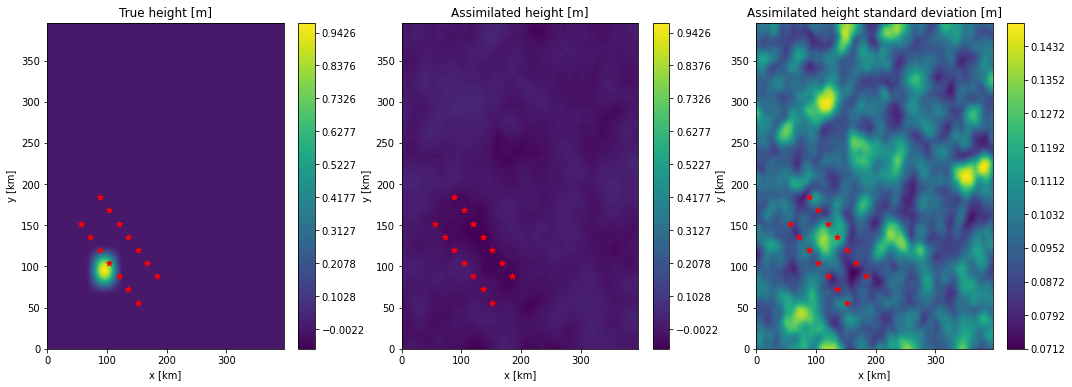

In [34]:
plt.rcParams["figure.figsize"] = (18,6)

n_contours = 100
zmax = max(np.max(z_t), np.max(z_avg)).magnitude
zmin = min(np.min(z_t), np.min(z_avg)).magnitude
levels = np.linspace(zmin, zmax, n_contours)

fig, ax = plt.subplots(1,3)
i1 = ax[0].contourf(x,y,z_t,levels)
i2 = ax[1].contourf(x,y,z_avg,levels)
i3 = ax[2].contourf(x,y,z_std,n_contours)

images = [i1,i2,i3]

ax[0].set_title(f"True height [{z_t.units:~}]")
ax[1].set_title(f"Assimilated height [{z_avg.units:~}]")
ax[2].set_title(f"Assimilated height standard deviation [{z_std.units:~}]")

for a,im in zip(ax,images):
    a.scatter(x_st, y_st, color = 'r', marker = '*')
    a.set_xlabel(f"x [{y.units:~}]")
    a.set_ylabel(f"y [{x.units:~}]")
    plt.colorbar(im,ax=a)

# Scatter plot of particle weights

In [ ]:
weights = fh["weights"][timestamp][:]
fig, ax = plt.subplots(1,2)

ax[0].plot(weights, '*')
ax[1].plot(weights, '*')
ax[1].set_yscale('log')

for a in ax:
    a.set_xlabel('Particle ID')
    a.set_ylabel('Weight ('+a.get_yscale() + ')')

# Time series of Estimated Sample Size

In [ ]:
ess = list()
for ts in list(fh["weights"])[1:]:
    ess.append(1/sum(fh["weights"][ts][:]**2))
fig = plt.figure()
t = np.arange(1,np.size(ess)+1)
plt.plot(t,ess)
plt.xlabel('Time step')
plt.ylabel('Estimated Sample Size (1 / sum(weight^2))');